mean_absolute_error 271362.43
mean_squared_error 129799583497.94
root_mean_squared_error 360277.09
R2 score 0.99


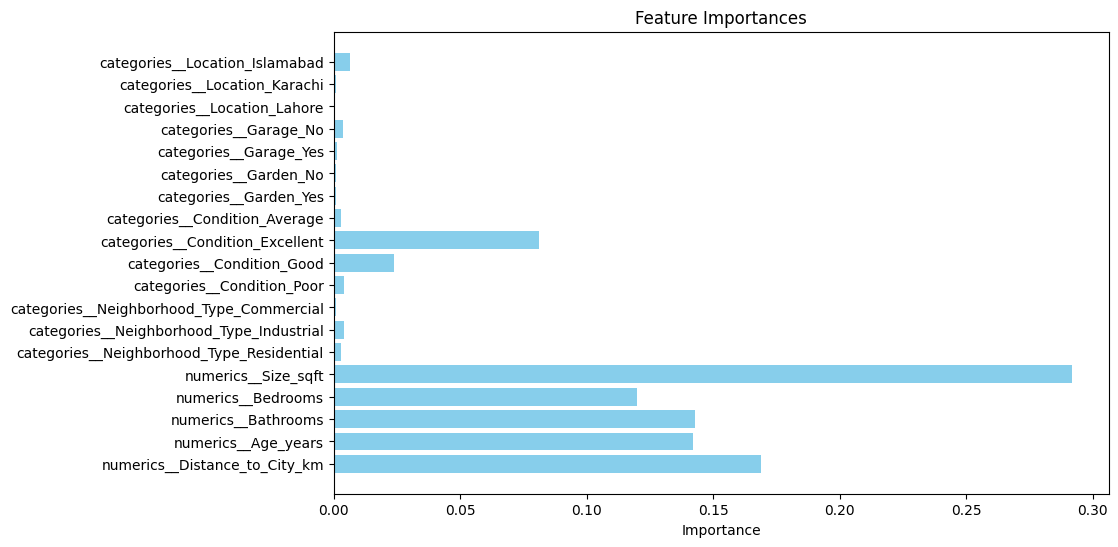

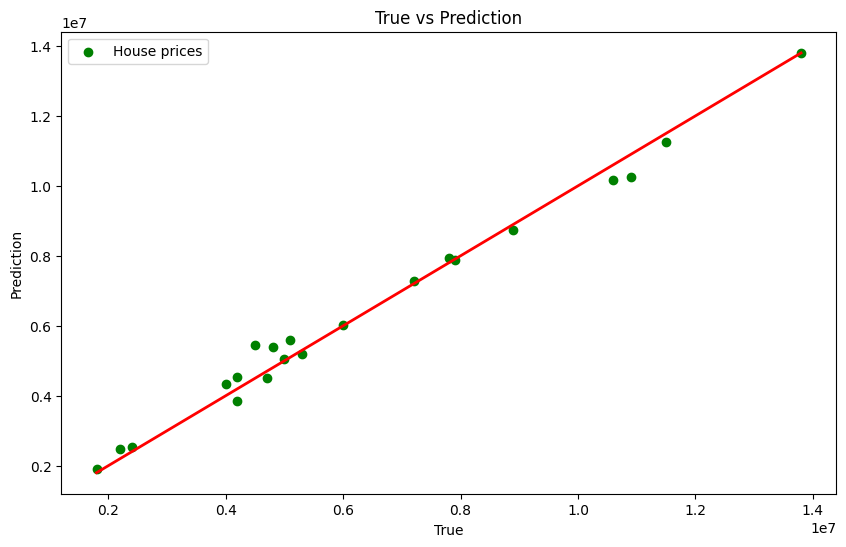

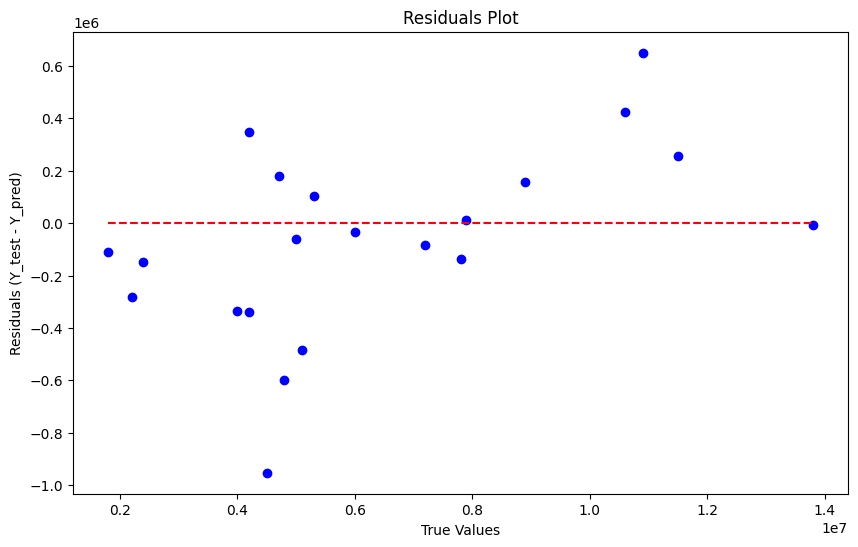

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# load dataset
df=pd.read_csv('house_price_dataset.txt')

# cleaning
df['Bedrooms']=df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Bathrooms']=df['Bathrooms'].fillna(df['Bathrooms'].mean())
df['Garage']=df['Garage'].fillna(df['Garage'].mode()[0])


# feature selection
Y=df['Price']
categories=['Location','Garage','Garden','Condition','Neighborhood_Type']
numerics=['Size_sqft','Bedrooms','Bathrooms','Age_years','Distance_to_City_km']
X=df[categories+numerics]


# preprocessor
preprocessor=ColumnTransformer([
    ('categories',OneHotEncoder(handle_unknown='ignore'),categories),
    ('numerics',MinMaxScaler(),numerics)
])


#model
best_model=RandomForestRegressor(
    random_state=42,
    max_depth=None,
    max_features=0.5,
    min_samples_split=2,
    n_estimators=300

)

# pipeline
pipe=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',best_model)
])

# train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# train the model
pipe.fit(X_train,Y_train)


# prediction
Y_pred=pipe.predict(X_test)

# metrics
print('mean_absolute_error',round(mean_absolute_error(Y_test,Y_pred),2))
print('mean_squared_error',round(mean_squared_error(Y_test,Y_pred),2))
print('root_mean_squared_error',round(root_mean_squared_error(Y_test,Y_pred),2))
print('R2 score',round(r2_score(Y_test,Y_pred),2))


# feature graph
features_names=pipe.named_steps['preprocessor'].get_feature_names_out(categories+numerics)
importances=pipe.named_steps['regressor'].feature_importances_
data_frame=pd.DataFrame({'features_names':features_names,'importances':importances})
plt.figure(figsize=(10,6))
plt.barh(data_frame['features_names'], data_frame['importances'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# visualization --->> scatter
plt.figure(figsize=(10,6))
plt.scatter(Y_test,Y_pred,color='Green',label='House prices')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color='red',linewidth=2)
plt.title('True vs Prediction')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.legend()
plt.show()


# Residual plot
residuals=Y_test-Y_pred
plt.figure(figsize=(10,6))
plt.scatter(Y_test, residuals, color='blue')
plt.hlines(y=0, xmin=Y_test.min(), xmax=Y_test.max(), colors='red', linestyles='--')
plt.title('Residuals Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals (Y_test - Y_pred)')
plt.show()
